# Математическая статистика. Лабораторная работа №1. Васильев Н. А.

# Задание №1

Сравним количество курящих мужчин и женщин.

In [93]:
!pip install -q gdown
import gdown

file_id = "1gzPRqj7gZetjsipo3xpogYGL76enZDNO"
file = "sex_bmi_smokers"

gdown.download(f"https://drive.google.com/uc?id={file_id}", file, quiet=False)

import pandas as pd

df = pd.read_csv(file)
smoker_counts = df.groupby(["sex", "smoker"]).size().unstack()

print("\n", smoker_counts)

if smoker_counts.loc['male', 'yes'] > smoker_counts.loc['female', 'no']:
    print("Курящих мужчин больше, чем некурящих женщин.")
elif smoker_counts.loc['male', 'yes'] < smoker_counts.loc['female', 'no']:
    print("Некурящих женщин больше, чем курящих мужчин.")
else:
    print("Некурящих женщин столько же, сколько курящих мужчин.")


Downloading...
From: https://drive.google.com/uc?id=1gzPRqj7gZetjsipo3xpogYGL76enZDNO
To: /content/sex_bmi_smokers
100%|██████████| 26.9k/26.9k [00:00<00:00, 37.4MB/s]


 smoker   no  yes
sex             
female  547  115
male    517  159
Некурящих женщин больше, чем курящих мужчин.


Рассчитаем выборочное среднее, выборочную дисперсию, выборочную медиану и выборочную квантиль порядка 3/5 ИМТ всех наблюдателей и отдельно для каждой возможной комбинации пол-курение.

Используем формулы:

- **Выборочное среднее**:  
  $$
  \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
  $$

- **Выборочная дисперсия** (несмещённая оценка):  
  $$
  S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2
  $$

- **Медиана**:  
  $$
  Me = X_{\left(\frac{n+1}{2}\right)}
  $$  
  (если \\( n \\) чётное, берётся среднее между двумя центральными значениями)

- **Выборочный квантиль порядка \\( p = \frac{3}{5} \\)**:  
  $$
  Q_p = X_{(p \cdot n)}
  $$  
  (если \\( p \cdot n \\) нецелое, берётся интерполяция между соседними значениями)

In [94]:
grouped = df.groupby(["sex", "smoker"])["bmi"]

def compute_statistics(group):
    return pd.Series({
        "Среднее": group.mean(),
        "Дисперсия": group.var(),
        "Медиана": group.median(),
        "Квантиль 3/5": group.quantile(0.6)
    })

overall_stats = compute_statistics(df["bmi"])
grouped_stats = grouped.apply(compute_statistics)

print("Статистики для всех наблюдений:")
print(overall_stats)
print("\nСтатистики для каждой комбинации 'пол-курение':")
print(grouped_stats)

Статистики для всех наблюдений:
Среднее         30.663397
Дисперсия       37.187884
Медиана         30.400000
Квантиль 3/5    32.032000
dtype: float64

Статистики для каждой комбинации 'пол-курение':
sex     smoker              
female  no      Среднее         30.539525
                Дисперсия       34.831015
                Медиана         30.210000
                Квантиль 3/5    31.912000
        yes     Среднее         29.608261
                Дисперсия       44.406251
                Медиана         28.380000
                Квантиль 3/5    30.876000
male    no      Среднее         30.770580
                Дисперсия       38.348801
                Медиана         30.495000
                Квантиль 3/5    32.110000
        yes     Среднее         31.504182
                Дисперсия       35.426638
                Медиана         31.130000
                Квантиль 3/5    33.244000
Name: bmi, dtype: float64


Построим график эмпирической функции распределения, гистограмму и blox-plot ИМТ для всех наблюдателей и отдельно для каждой возможной комбинации пол-курение.

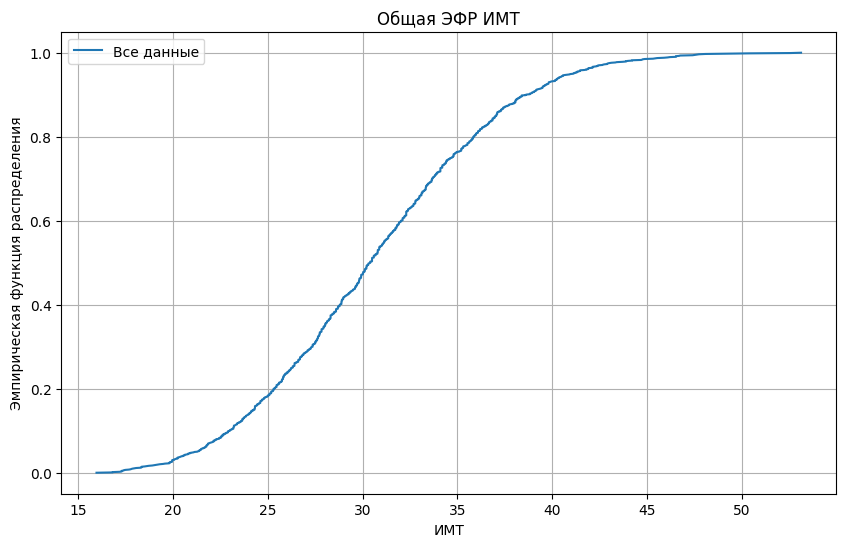

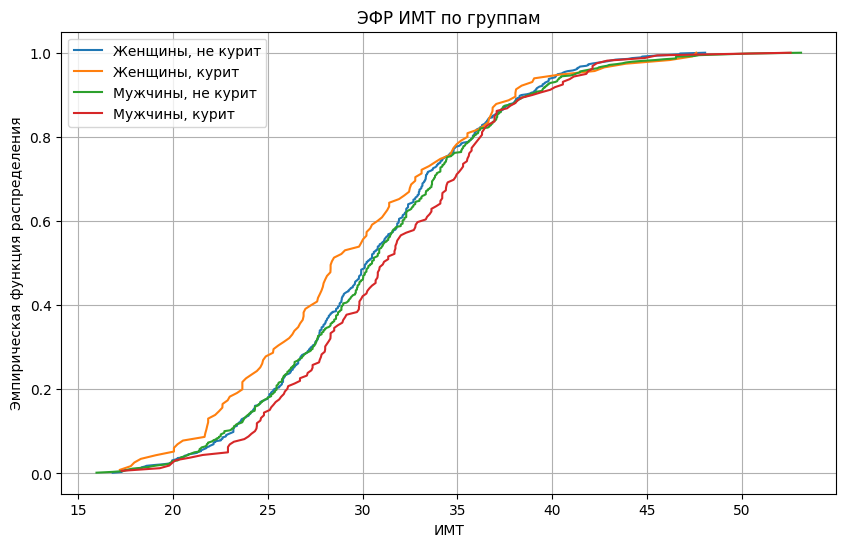

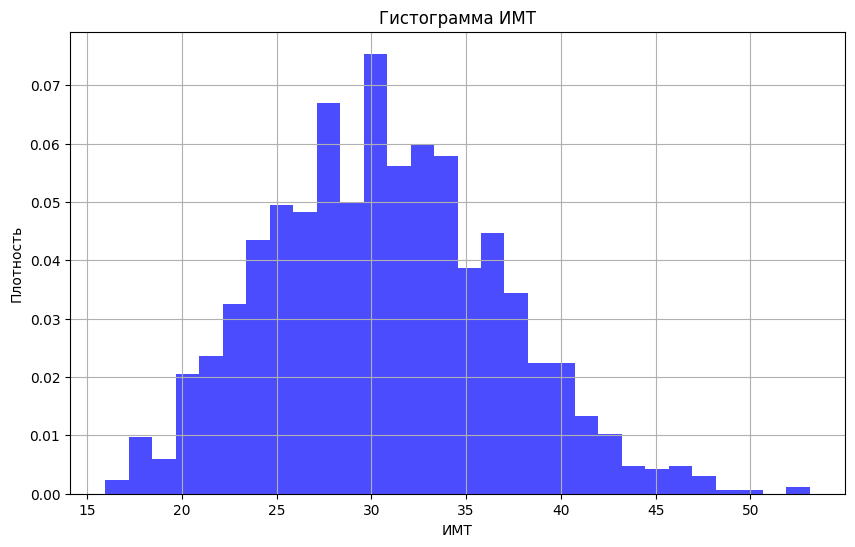

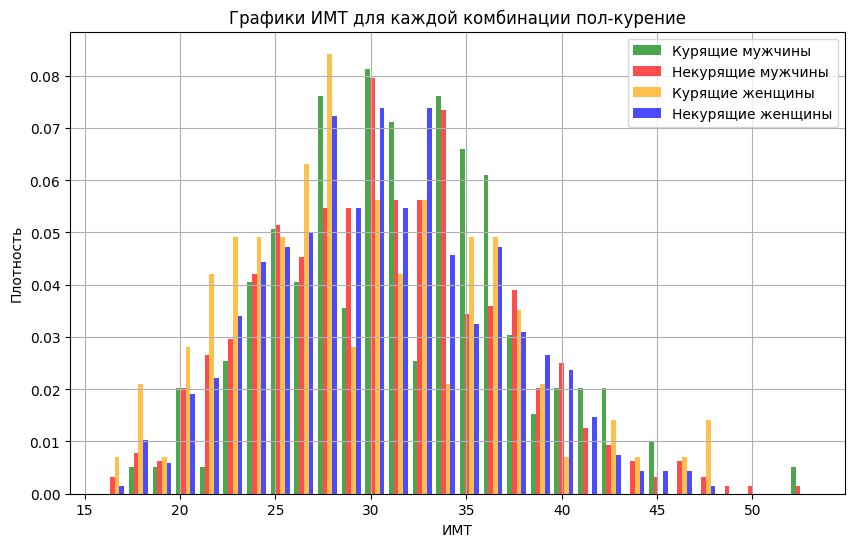

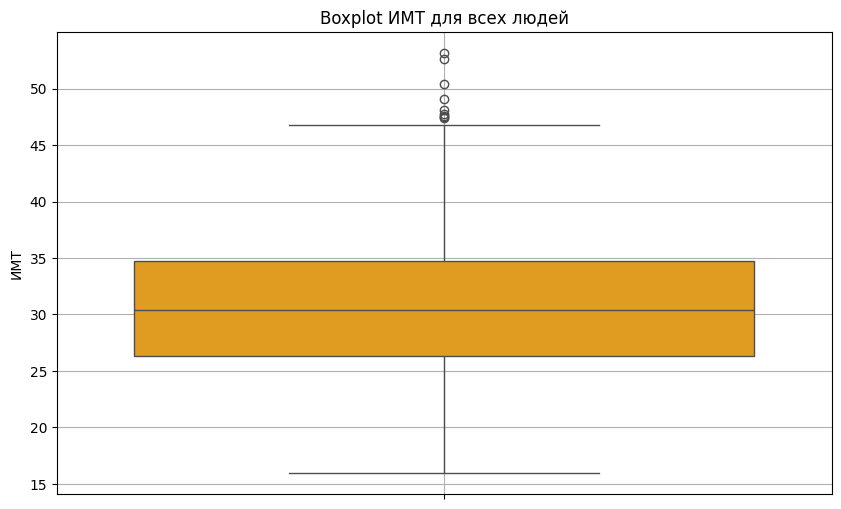

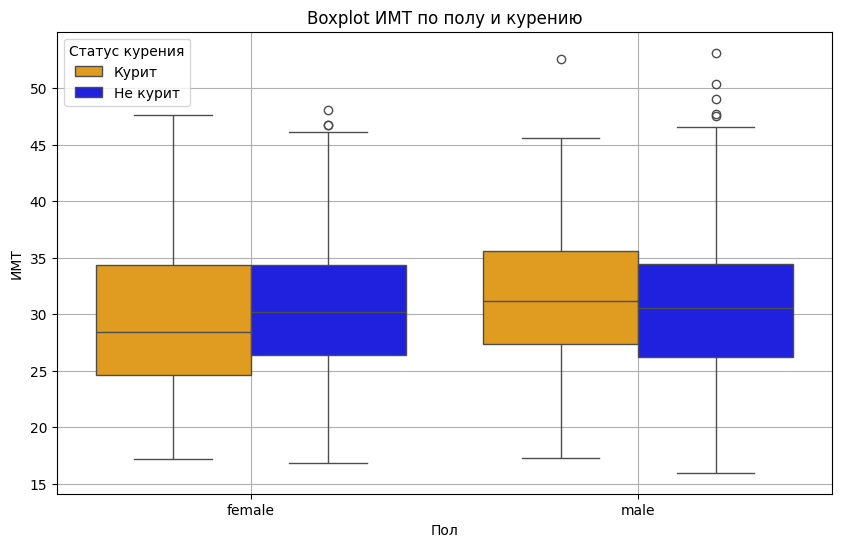

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

ecdf = sm.distributions.ECDF(df["bmi"])

plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label="Все данные")

plt.xlabel("ИМТ")
plt.ylabel("Эмпирическая функция распределения")
plt.title("Общая ЭФР ИМТ")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for (sex, smoker), group in df.groupby(["sex", "smoker"]):
    ecdf = sm.distributions.ECDF(group["bmi"])
    plt.plot(ecdf.x, ecdf.y, label=f"{'Мужчины' if sex == 'male' else 'Женщины'}, {'курит' if smoker == 'yes' else 'не курит'}")

plt.xlabel("ИМТ")
plt.ylabel("Эмпирическая функция распределения")
plt.title("ЭФР ИМТ по группам")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["bmi"], bins=30, density=True, color="blue", alpha=0.7)
plt.xlabel("ИМТ")
plt.ylabel("Плотность")
plt.title("Гистограмма ИМТ")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
male_smokers_bmi = df[(df["sex"] == "male") & (df["smoker"] == "yes")]["bmi"]
male_non_smokers_bmi = df[(df["sex"] == "male") & (df["smoker"] == "no")]["bmi"]
female_smokers_bmi = df[(df["sex"] == "female") & (df["smoker"] == "yes")]["bmi"]
female_non_smokers_bmi = df[(df["sex"] == "female") & (df["smoker"] == "no")]["bmi"]
colors = [ "green", "red", "orange", "blue"]
plt.hist([male_smokers_bmi, male_non_smokers_bmi, female_smokers_bmi, female_non_smokers_bmi],
         bins=30, density=True, color=colors, label=["Курящие мужчины", "Некурящие мужчины",
                                                     "Курящие женщины", "Некурящие женщины"],
         alpha=0.7, histtype="bar")
plt.xlabel("ИМТ")
plt.ylabel("Плотность")
plt.title("Графики ИМТ для каждой комбинации пол-курение")
plt.legend(loc="upper right")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df["bmi"], color="orange")
plt.ylabel("ИМТ")
plt.title("Boxplot ИМТ для всех людей")
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="sex", y="bmi", hue="smoker", palette={"yes": "orange", "no": "blue"})
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Курит", "Не курит"], title="Статус курения")
plt.xlabel("Пол")
plt.ylabel("ИМТ")
plt.title("Boxplot ИМТ по полу и курению")
plt.grid()
plt.show()

# Задание №2

 Определим вероятностное распределение ИМТ. Для этого построим гистограмму и ядерную оценку плотности (KDE) для визуальной проверки распределения.

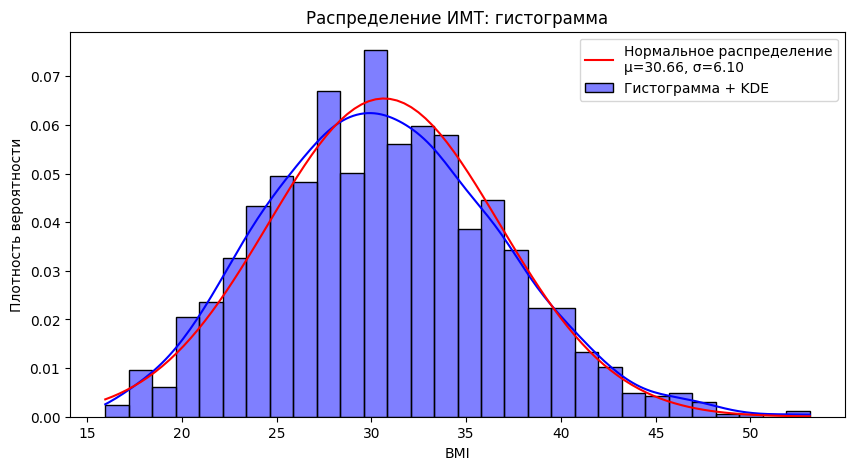

In [84]:
import scipy.stats as stats

bmi_data = df["bmi"].dropna()

plt.figure(figsize=(10, 5))
sns.histplot(bmi_data, bins=30, kde=True, color="blue", stat="density", label="Гистограмма + KDE")

mu, sigma = stats.norm.fit(bmi_data)
x = np.linspace(min(bmi_data), max(bmi_data), 100)
pdf_norm = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf_norm, 'r-', label=f"Нормальное распределение\nμ={mu:.2f}, σ={sigma:.2f}")

plt.xlabel("BMI")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.title("Распределение ИМТ: гистограмма")
plt.show()


На основании гистограммы ИМТ можно предположить, что распределение ИМТ подчиняется нормальному закону:

$$ X\sim \mathcal{N}\left( \mu, \sigma^{2} \right) $$

Проверим это, учитывая, что при нормальном распределении:

* Если \\( k = 1\\), то мы рассматриваем интервал \\(\mu ± 1\sigma\\), где лежит 68% значений.
* Если \\( k = 2\\), то интервал \\(\mu ± 2\sigma\\), где 95% значений.
* Если \\( k = 3\\), то интервал \\(\mu ± 3\sigma\\), где 99,7% значений.

In [50]:
mu_hat = df["bmi"].mean()
sigma_hat = df["bmi"].std()

intervals = {
    "1σ (68%)": (mu_hat - sigma_hat, mu_hat + sigma_hat),
    "2σ (95%)": (mu_hat - 2 * sigma_hat, mu_hat + 2 * sigma_hat),
    "3σ (99.7%)": (mu_hat - 3 * sigma_hat, mu_hat + 3 * sigma_hat)
}

percentages = {}
for label, (lower, upper) in intervals.items():
    within_interval = df["bmi"].between(lower, upper).mean() * 100
    percentages[label] = within_interval

expected_values = {"1σ (68%)": 68, "2σ (95%)": 95, "3σ (99.7%)": 99.7}

results_df = pd.DataFrame.from_dict(percentages, orient="index", columns=["Процент данных"])
print(results_df)

tolerance = 2

is_normal = all(
    abs(percentages[key] - expected_values[key]) <= tolerance for key in expected_values
)

if is_normal:
  print("Получаем нормальное распределение")
else:
  print("Распределение не является нормальным")

print("(Погрешность = 2%)")

            Процент данных
1σ (68%)         66.965620
2σ (95%)         95.739910
3σ (99.7%)       99.701046
Получаем нормальное распределение
(Погрешность = 2%)


Оценим параметры распределения методом моментов. Метод моментов ищет параметры, при которых выборочные моменты совпадают с теоретическими.

Для нормального распределения:


*   Теоретическое мат. ожидание:
$$ \mathbb{E}\left[ X \right]=\mu $$
*   Теоритическая дисперсия:
$$ Var\left[ X \right]=\sigma^{2} $$

Теперь приравниваем к выборочным моментам:


*   Выборочное среднее:
$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i $$
*   Выборочная дисперсия (несмещённая):
$$ \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

где \\(\bar{X}\\) — выборочное среднее:

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

Распишем сумму квадратов отклонений:

$$ \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

Используем разложение:

$$ \sum_{i=1}^{n} (X_i - \bar{X})^2 = \sum_{i=1}^{n} X_i^2 - n\bar{X}^2 $$

Возьмём математическое ожидание:

$$ \mathbb{E} \left[ \sum_{i=1}^{n} (X_i - \bar{X})^2 \right] = n \sigma^2 - \sigma^2 $$

Так как:

$$ \mathbb{E}[\bar{X}^2] = \frac{\sigma^2}{n} $$

Тогда получаем:

$$ \mathbb{E}[\hat{\sigma}^2] = \frac{1}{n-1} (n\sigma^2 - \sigma^2) = \sigma^2 $$

То есть оценка дисперсии \\(\hat{\sigma}^2\\) несмещённая.

В итоге получаем:

$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

$$ \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$
Где \\( \bar{X} \\) — выборочное среднее.

In [63]:
mu_mm = df['bmi'].mean()
sigma_mm = df['bmi'].var(ddof=0)

print(f"Оценка методом моментов: μ = {mu_mm:.4f}, σ = {sigma_mm:.4f}")

Оценка методом моментов: μ = 30.6634, σ = 37.1601


Свойства оценок:

Несмещённость:

*   \\(\hat{\mu}\\) является несмещённой оценкой;
*   \\(\hat{\sigma}^{2}\\) по методу моментов — несмещённая оценка, а по методу максимального правдоподобия немного смещена.

Состоятельность:

*   Оценки сходятся к истинным параметрам при \\(n\to \infty \\).

Эффективность:

*   Оценка \\(\hat{\mu}\\) является эффективной, так как она достигает границы неравенства Крамера-Рао.


Найдем теоретические смещение, дисперсию, MSE и информацию Фишера.

*   Теоритическое смещение:
$$ \text{Bias}(\hat{\mu})=0$$

$$ \text{Bias}(\hat{\sigma}^{2})\approx 0 $$
*   Дисперсия:
$$ Var(\hat{\mu})=\frac{\sigma^{2}}{n} $$
$$ Var(\hat{\sigma}^{2})=\frac{2\sigma^{4}}{n-1} $$
*   MSE (среднеквадратичная ошибка):
$$ MSE(\hat{\mu})=\frac{\sigma^{2}}{n} $$
$$ MSE(\hat{\sigma}^{2})=\frac{2\sigma^{4}}{n-1} $$


In [49]:
n = len(df["bmi"])
mu_hat = df["bmi"].mean()
sigma_hat_sq = df["bmi"].var(ddof=1)  # Несмещённая оценка дисперсии (ddof=1)

bias_mu = 0
var_mu = sigma_hat_sq / n
mse_mu = var_mu + bias_mu**2

results_mu = pd.DataFrame({
    "Показатель": ["Смещение", "Дисперсия", "MSE"],
    "Значение": [bias_mu, var_mu, mse_mu]
})

print("Для μ:")
print(results_mu)

Для μ:
  Показатель  Значение
0   Смещение  0.000000
1  Дисперсия  0.027794
2        MSE  0.027794


In [48]:
n = len(df["bmi"])
sigma_hat_sq = df["bmi"].var(ddof=1)  # Несмещённая оценка дисперсии (ddof=1)

bias_sigma_sq = -sigma_hat_sq / n
var_sigma_sq = (2 * (n - 1) * sigma_hat_sq**2) / n**2
mse_sigma_sq = var_sigma_sq + bias_sigma_sq**2

results = pd.DataFrame({
    "Показатель": ["Смещение", "Дисперсия", "MSE"],
    "Значение": [bias_sigma_sq, var_sigma_sq, mse_sigma_sq]
})

print("Для σ:")
print(results)

Для σ:
  Показатель  Значение
0   Смещение -0.027794
1  Дисперсия  2.065628
2        MSE  2.066400


Для нормального распределения \\( X\sim \mathcal{N}\left( \mu, \sigma^{2} \right) \\) функция правдоподобия имеет вид:

$$ I_n(\theta) = E_{\theta} \left( \frac{\partial \ln L(\theta, x_1, \dots, x_n)}{\partial \theta} \right)^2 $$

Логарифм функции правдоподобия:

$$ \ln L=-\frac{n}{2}\ln (2\pi)-\frac{n}{2}\ln (\sigma^{2})-\frac{1}{2\sigma^{2}}\sum(x_{i}-\mu)^{2} $$

Теперь берём вторые производные:

По \\( \mu \\):

$$ \frac{\partial^2 \ln L}{\partial \mu^2} = -\frac{n}{\sigma^2} $$

По \\( \sigma^{2} \\):

$$ \frac{\partial^2 \ln L}{\partial (\sigma^2)^2} = \frac{n}{2\sigma^4} - \frac{1}{\sigma^6} \sum (x_i - \mu)^2 $$

Смешанная производная (по \\( \mu \\) и по \\( \sigma^{2} \\)):

$$ \frac{\partial^2 \ln L}{\partial \mu \partial \sigma^2} = 0 $$

Формула информации Фишера определяется как:

$$ I(\theta) = E\left[\frac{\partial^2 \ln L}{\partial \mu^2}\right] $$

Для \\( \mu \\):

$$ E\left[\frac{\partial^2 \ln L}{\partial \mu^2}\right] = -\frac{n}{\sigma^2} $$

Это даёт информацию Фишера:

$$ I(\mu) = \frac{n}{\sigma^2} $$

Для \\( \sigma^{2} \\):

$$ E\left[\frac{\partial^2 \ln L}{\partial (\sigma^2)^2}\right] = E\left[\frac{n}{2\sigma^4} - \frac{1}{\sigma^6} \sum (x_i - \mu)^2\right] $$

Используем свойство дисперсии:

$$ E\left[ \sum (x_i - \mu)^2 \right] = (n-1) \sigma^2 $$

Подставляем:

$$ E\left[\frac{\partial^2 \ln L}{\partial (\sigma^2)^2}\right] = -\frac{n}{2\sigma^4} + \frac{n-1}{\sigma^4} $$

Информация Фишера:

$$ I(\sigma^2) = \frac{n}{2\sigma^4} $$

Информация Фишера для нормального распределения с параметрами \\( \mu, \sigma^{2} \\) записывается в виде матрицы:

$$ I(\theta)=n\cdot i(\theta) $$

где \\( i(\theta) \\) — информация Фишера для одного наблюдения:

$$ i(\theta) = E\left[\frac{\partial^2 \ln L}{\partial \theta^2}\right] $$

Так как \\( \theta=(\mu, \sigma^{2}) \\), то матрица информации Фишера имеет вид:

$$
i(\theta)=
\begin{bmatrix}
-E\left[\frac{\partial^2\ln L}{\partial\mu^2}\right]
&
-E\left[\frac{\partial^2\ln L}{\partial\mu\partial\sigma^2}\right]
\\
-E\left[\frac{\partial^2\ln L}{\partial\sigma^2\partial\mu}\right]
&
-E\left[\frac{\partial^2\ln L}{\partial(\sigma^2)^2}\right]
\end{bmatrix}
$$

Подставляя ранее вычисленные значения:

$$
i(\theta)=
\begin{bmatrix}
\frac{n}{\sigma^2}
&
0
\\
0
&
\frac{n}{2\sigma^4}
\end{bmatrix}
$$

Соответственно, для \\(n\\) наблюдений:

$$
I(\theta)=
\begin{bmatrix}
\frac{n}{\sigma^2}
&
0
\\
0
&
\frac{n}{2\sigma^4}
\end{bmatrix}
$$

Теперь мы можем найти обратную матрицу информации Фишера, которая даёт асимптотическую ковариационную матрицу оценок \\((\hat{\mu}, \hat{\sigma}^{2}) \\)


$$
I^{-1}(\theta)=
\begin{bmatrix}
\frac{\sigma^2}{n}
&
0
\\
0
&
\frac{2\sigma^4}{n}
\end{bmatrix}
$$

In [52]:
n = len(df["bmi"])

sigma_hat_sq = df["bmi"].var(ddof=1)

I_matrix = np.array([
    [n / sigma_hat_sq, 0],
    [0, n / (2 * sigma_hat_sq**2)]
])

I_matrix_inv = np.linalg.inv(I_matrix)

fisher_info = pd.DataFrame(I_matrix, columns=["μ", "σ^2"], index=["μ", "σ^2"])
fisher_info_inv = pd.DataFrame(I_matrix_inv, columns=["μ", "σ^2"], index=["μ", "σ^2"])

print("Матрица информации Фишера:")
print(fisher_info)

print("\nОбратная матрица информации Фишера (асимптотическая ковариация):")
print(fisher_info_inv)

Матрица информации Фишера:
             μ       σ^2
μ    35.979461  0.000000
σ^2   0.000000  0.483752

Обратная матрица информации Фишера (асимптотическая ковариация):
            μ       σ^2
μ    0.027794  0.000000
σ^2  0.000000  2.067173


# Задание 3

В данном случае мы рассматриваем равномерное распределение \\( U[-2\theta; 4\theta] \\).

Выберем несколько значений \\(n\\), чтобы проанализировать поведение оценки параметра:

$$ n = \left\{10, 50, 100, 500, 100\right\} $$

In [53]:
sample_sizes = [10, 50, 100, 500, 1000]

print("Объемы выборок:", sample_sizes)

Объемы выборок: [10, 50, 100, 500, 1000]


Для каждой \\(n\\) сгенерируем \\(M = 1000\\) выборок и вычислим оценку \\(\hat{\theta}\\)

In [68]:
M = 1000

mu_estimates = {n: [] for n in sample_sizes}
sigma_sq_estimates = {n: [] for n in sample_sizes}

for n in sample_sizes:
    for _ in range(M):
        sample = np.random.normal(loc=mu_mm, scale=sigma_mm**0.5, size=n)
        mean_hat = np.mean(sample)
        mu_estimates[n].append(mean_hat)

        var_hat = np.var(sample, ddof=0)
        sigma_sq_estimates[n].append(var_hat)

df_theta = pd.DataFrame(mu_estimates)
df_sigma_sq = pd.DataFrame(sigma_sq_estimates)

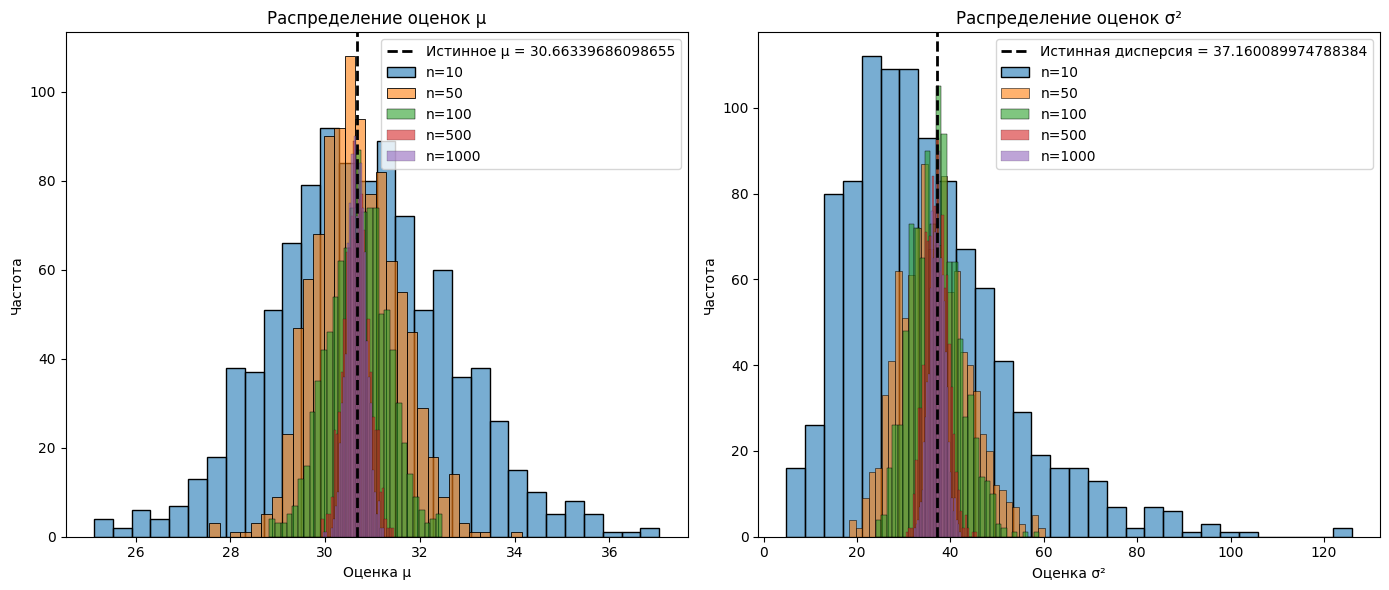

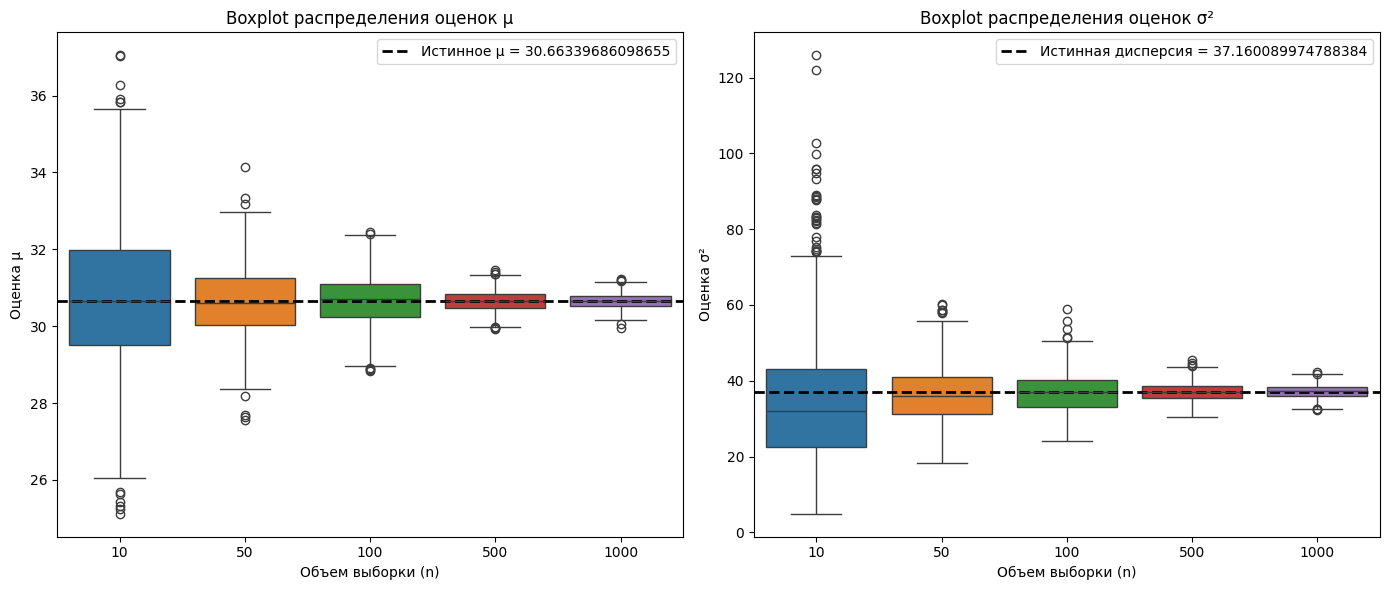

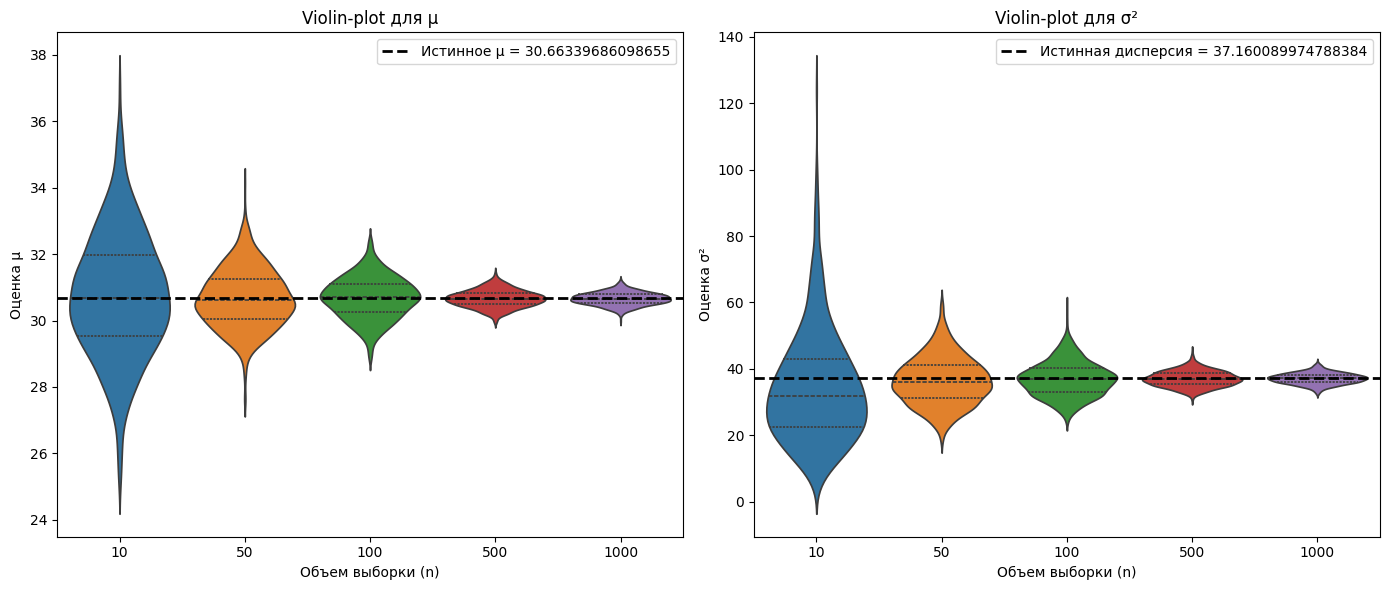

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
for n in sample_sizes:
    sns.histplot(mu_estimates[n], bins=30, kde=False, label=f"n={n}", ax=axes[0], alpha=0.6)

axes[0].axvline(mu_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинное μ = {mu_mm}")
axes[0].set_xlabel("Оценка μ")
axes[0].set_ylabel("Частота")
axes[0].set_title("Распределение оценок μ")
axes[0].legend()

for n in sample_sizes:
    sns.histplot(sigma_sq_estimates[n], bins=30, kde=False, label=f"n={n}", ax=axes[1], alpha=0.6)

axes[1].axvline(sigma_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинная дисперсия = {sigma_mm}")
axes[1].set_xlabel("Оценка σ²")
axes[1].set_ylabel("Частота")
axes[1].set_title("Распределение оценок σ²")
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=pd.DataFrame(mu_estimates), ax=axes[0])
axes[0].axhline(mu_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинное μ = {mu_mm}")
axes[0].set_xlabel("Объем выборки (n)")
axes[0].set_ylabel("Оценка μ")
axes[0].set_title("Boxplot распределения оценок μ")
axes[0].legend()

sns.boxplot(data=pd.DataFrame(sigma_sq_estimates), ax=axes[1])
axes[1].axhline(sigma_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинная дисперсия = {sigma_mm}")
axes[1].set_xlabel("Объем выборки (n)")
axes[1].set_ylabel("Оценка σ²")
axes[1].set_title("Boxplot распределения оценок σ²")
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin-plot
sns.violinplot(data=df_theta, ax=axes[0], inner="quartile")
axes[0].axhline(mu_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинное μ = {mu_mm}")
axes[0].set_xlabel("Объем выборки (n)")
axes[0].set_ylabel("Оценка μ")
axes[0].set_title("Violin-plot для μ")
axes[0].legend()

sns.violinplot(data=df_sigma_sq, ax=axes[1], inner="quartile")
axes[1].axhline(sigma_mm, color="black", linestyle="dashed", linewidth=2, label=f"Истинная дисперсия = {sigma_mm}")
axes[1].set_xlabel("Объем выборки (n)")
axes[1].set_ylabel("Оценка σ²")
axes[1].set_title("Violin-plot для σ²")
axes[1].legend()

plt.tight_layout()
plt.show()


In [91]:
for n in sample_sizes:
  print("\nn = ", n)
  print("μ: среднее = ", np.mean(df_theta[n]), " дисперсия = ", np.var(df_theta[n]), " отклонение среднего = ", np.mean((df_theta[n]) - mu_mm))
  print("σ²: среднее = ", np.mean(df_sigma_sq[n]), " дисперсия = ", np.var(df_sigma_sq[n]), " отклонение среднего = ", np.mean((df_sigma_sq[n]) - sigma_mm))


n =  10
μ: среднее =  30.750699022179564  дисперсия =  3.4795336768377743  отклонение среднего =  0.08730216119301773
σ²: среднее =  34.66256504897426  дисперсия =  286.7043562278813  отклонение среднего =  -2.4975249258141274

n =  50
μ: среднее =  30.664514732474647  дисперсия =  0.7717190856080892  отклонение среднего =  0.0011178714880978654
σ²: среднее =  36.467953035922086  дисперсия =  51.74804303986005  отклонение среднего =  -0.6921369388662956

n =  100
μ: среднее =  30.683776464326378  дисперсия =  0.38710975766417083  отклонение среднего =  0.020379603339831596
σ²: среднее =  36.89817325050864  дисперсия =  26.632812062545877  отклонение среднего =  -0.26191672427973833

n =  500
μ: среднее =  30.66321159003157  дисперсия =  0.06707270074571066  отклонение среднего =  -0.00018527095498117418
σ²: среднее =  37.05772580580019  дисперсия =  5.458462298122461  отклонение среднего =  -0.10236416898819693

n =  1000
μ: среднее =  30.66037977602427  дисперсия =  0.036345838373097